                                             PART ONE: Data Wrangling
                                         

NO missing values, it because we used inner join after obtaining the data  

In [708]:
import statistics
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import re
conn = sqlite3.connect('lahman2014.sqlite')

payroll = pd.read_sql_query("SELECT teamID, yearID, sum(salary)/1000 as Total_Payroll, sum(salary)/count(salary) as Total_Payroll_Mean FROM Salaries GROUP BY teamID, yearID", conn)

winperc = pd.read_sql_query("SELECT  teamID, yearID,  (W*100.0/G) as Winning_Percentage_Mean FROM Teams GROUP BY teamID, yearID", conn)

table = pd.merge(payroll, winperc,how='outer', on=['teamID','yearID'])

table = table.fillna(table.mean())
table

,teamID,yearID,Total_Payroll,Total_Payroll_Mean,Winning_Percentage_Mean
0,ATL,1985,14807.00000,6.730455e+05,40.740741
1,BAL,1985,11560.71200,5.254869e+05,51.552795
2,BOS,1985,10897.56000,4.359024e+05,49.693252
3,CAL,1985,14427.89400,5.152819e+05,55.555556
4,CHA,1985,9846.17800,4.688656e+05,52.147239
5,CHN,1985,12702.91700,5.774053e+05,47.530864
6,CIN,1985,8359.91700,3.799962e+05,54.938272
7,CLE,1985,6551.66600,3.275833e+05,37.037037
8,DET,1985,10348.14300,5.174072e+05,52.173913
9,HOU,1985,9993.05100,4.996525e+05,51.234568


                                      PART TWO: Exploratory Data Analysis

Payroll distribution



Q1: The payroll distribution is increasing by the time for all teams, gaps between payroll is also increasing by the time for all teams, Some teams become much more wealthier than the others and the difference between the wealthies and poorest teams seems to be increasing

Text(0, 0.5, 'Total Payroll')

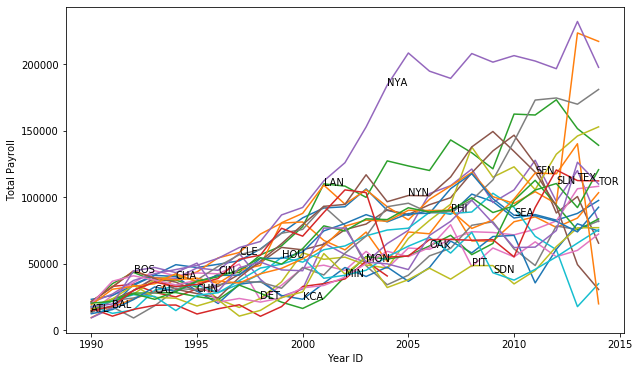

In [709]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
table.sort_values("yearID", ascending=True)
table1 = table[table.yearID >= 1990] 
table1 = table1[table1.yearID <= 2014]
tmp = table1['teamID'].drop_duplicates()
table1 = table1.set_index(keys='teamID')
table1 = table1.dropna()
y = 1990
for i in tmp:
    r1 = table1.loc[lambda x: x['yearID'] == y]
    if i in r1.index:
        if (y <= 2014):
            n = r1.loc[i,'Total_Payroll']
            plt.annotate(i, xy = (y, n))
            w = table1.loc[i,'yearID']
            z = table1.loc[i,'Total_Payroll']
            plt.plot(w, z)
            y+=1    
ax.set_xlabel("Year ID")
ax.set_ylabel("Total Payroll")              

Correlation between payroll and winning percentage

spending more money on players is more likely to result in a team winning more games

Q1: Team "NYA" is standing out as being particularly good at paying for wins across these periods

Q2: OaklandA's spending efficiency across these periods is being in mean of them or higher, they were winning more for less payroll, they are still high in average winning compared to any team that spent as little as they did

Text(0, 0.5, 'Total Payroll Mean')

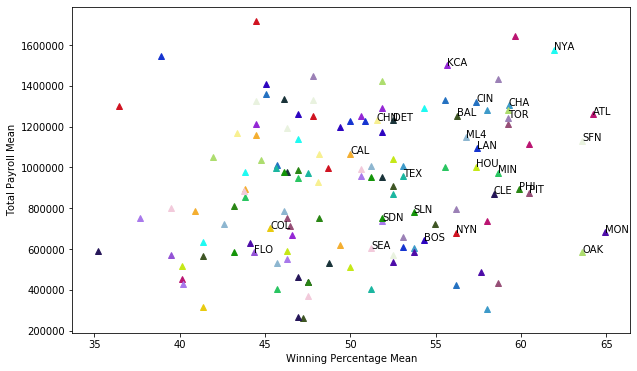

In [710]:
#1990-1994
fig, ax = plt.subplots(1,1, figsize=(10,6))
period1 = table[table.yearID >= 1990] 
period1 = period1[period1.yearID <= 1994]
new= period1.set_index("teamID")
t1 = period1['teamID'].drop_duplicates()
for i in t1:
    g1 = period1.loc[lambda x: x['teamID'] == i]
    maxv1 = g1.loc[g1['Winning_Percentage_Mean'].idxmax()]
    plt.annotate(i, xy = (maxv1['Winning_Percentage_Mean'], maxv1['Total_Payroll_Mean']))
    x = new.loc[i,'Winning_Percentage_Mean']
    y = new.loc[i,'Total_Payroll_Mean']
    plt.plot(x, y, '^', color=np.random.rand(3,))
ax.set_xlabel("Winning Percentage Mean")
ax.set_ylabel("Total Payroll Mean") 

Text(0, 0.5, 'Total Payroll Mean')

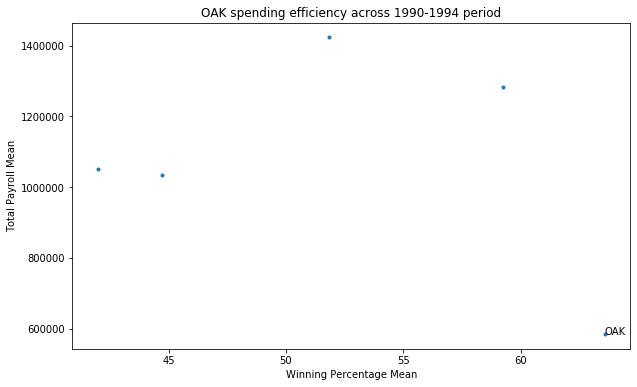

In [711]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
period1 = table[table.yearID >= 1990] 
period1 = period1[period1.yearID <= 1994]
period1 = period1[period1.teamID == 'OAK']
new= period1.set_index("teamID")
t1 = period1['teamID'].drop_duplicates()
for i in t1:
    g1 = period1.loc[lambda x: x['teamID'] == i]
    maxv1 = g1.loc[g1['Winning_Percentage_Mean'].idxmax()]
    plt.annotate(i, xy = (maxv1['Winning_Percentage_Mean'], maxv1['Total_Payroll_Mean']))
    x = new.loc[i,'Winning_Percentage_Mean']
    y = new.loc[i,'Total_Payroll_Mean']
    plt.plot(x, y, '.')
plt.title('OAK spending efficiency across 1990-1994 period')    
ax.set_xlabel("Winning Percentage Mean")
ax.set_ylabel("Total Payroll Mean") 

Text(0, 0.5, 'Total Payroll Mean')

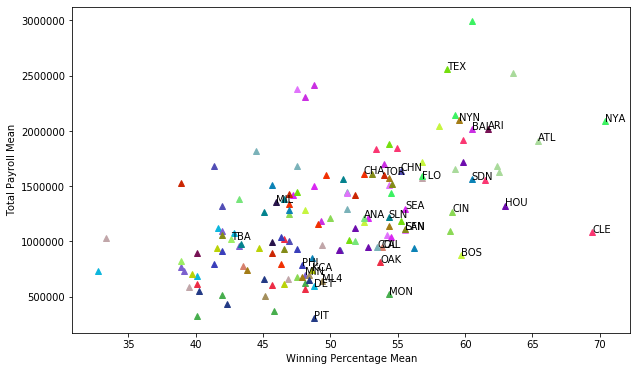

In [712]:
#1995-1999
fig, ax = plt.subplots(1,1, figsize=(10,6))
period2 = table[table.yearID >= 1995] 
period2 = period2[period2.yearID <= 1999]
new2= period2.set_index("teamID")
t = period2['teamID'].drop_duplicates()
period2.dropna(inplace = True) 
for i in t:
    g2 = period2.loc[lambda x: x['teamID'] == i]
    maxv2 = g2.loc[g2['Winning_Percentage_Mean'].idxmax()]
    plt.annotate(i, xy = (maxv2['Winning_Percentage_Mean'], maxv2['Total_Payroll_Mean']))
    x1 = new2.loc[i,'Winning_Percentage_Mean']
    y1 = new2.loc[i,'Total_Payroll_Mean']
    plt.plot(x1, y1, '^', color=np.random.rand(3,))    
ax.set_xlabel("Winning Percentage Mean")
ax.set_ylabel("Total Payroll Mean")  

Text(0, 0.5, 'Total Payroll Mean')

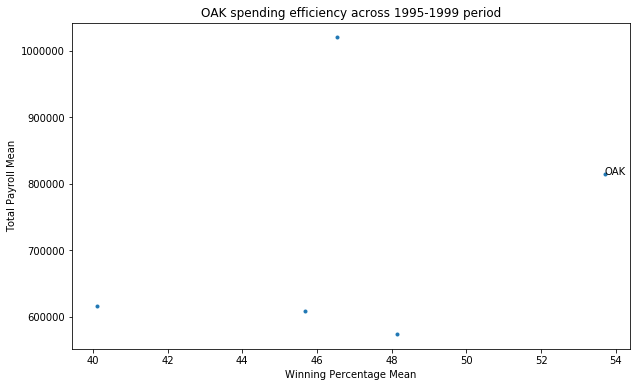

In [713]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
period1 = table[table.yearID >= 1995] 
period1 = period1[period1.yearID <= 1999]
period1 = period1[period1.teamID == 'OAK']
new= period1.set_index("teamID")
t1 = period1['teamID'].drop_duplicates()
for i in t1:
    g1 = period1.loc[lambda x: x['teamID'] == i]
    maxv1 = g1.loc[g1['Winning_Percentage_Mean'].idxmax()]
    plt.annotate(i, xy = (maxv1['Winning_Percentage_Mean'], maxv1['Total_Payroll_Mean']))
    x = new.loc[i,'Winning_Percentage_Mean']
    y = new.loc[i,'Total_Payroll_Mean']
    plt.plot(x, y, '.')
plt.title('OAK spending efficiency across 1995-1999 period')
ax.set_xlabel("Winning Percentage Mean")
ax.set_ylabel("Total Payroll Mean")  

Text(0, 0.5, 'Total Payroll Mean')

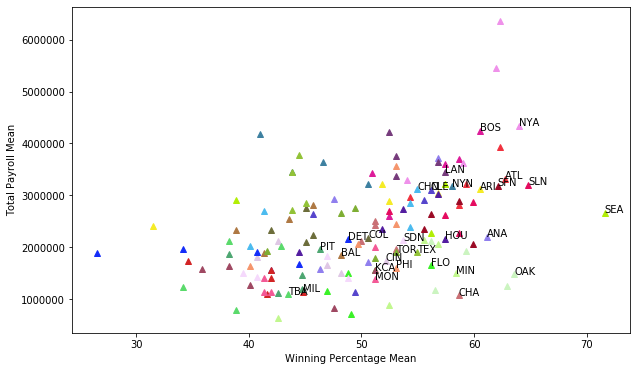

In [714]:
#2000-2004
fig, ax = plt.subplots(1,1, figsize=(10,6))
period3 = table[table.yearID >= 2000] 
period3 = period3[period3.yearID <= 2004]
new3= period3.set_index("teamID")
t = period3['teamID'].drop_duplicates()
period3.dropna(inplace = True) 
for i in t:
    g3 = period3.loc[lambda x: x['teamID'] == i]
    maxv3 = g3.loc[g3['Winning_Percentage_Mean'].idxmax()]
    plt.annotate(i, xy = (maxv3['Winning_Percentage_Mean'], maxv3['Total_Payroll_Mean']))
    x1 = new3.loc[i,'Winning_Percentage_Mean']
    y1 = new3.loc[i,'Total_Payroll_Mean']
    plt.plot(x1, y1, '^', color=np.random.rand(3,))    
ax.set_xlabel("Winning Percentage Mean")
ax.set_ylabel("Total Payroll Mean") 

Text(0, 0.5, 'Total Payroll Mean')

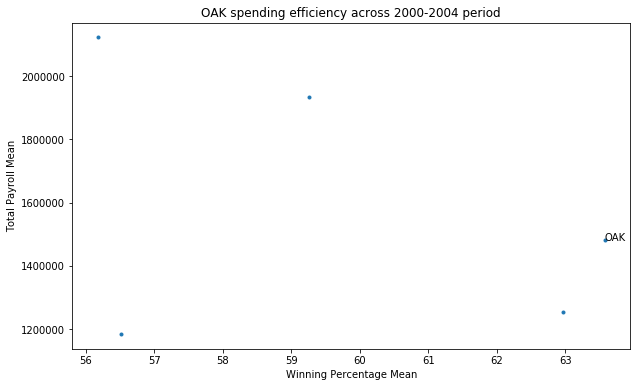

In [715]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
period1 = table[table.yearID >= 2000] 
period1 = period1[period1.yearID <= 2004]
period1 = period1[period1.teamID == 'OAK']
new= period1.set_index("teamID")
t1 = period1['teamID'].drop_duplicates()
for i in t1:
    g1 = period1.loc[lambda x: x['teamID'] == i]
    maxv1 = g1.loc[g1['Winning_Percentage_Mean'].idxmax()]
    plt.annotate(i, xy = (maxv1['Winning_Percentage_Mean'], maxv1['Total_Payroll_Mean']))
    x = new.loc[i,'Winning_Percentage_Mean']
    y = new.loc[i,'Total_Payroll_Mean']
    plt.plot(x, y, '.')
plt.title('OAK spending efficiency across 2000-2004 period')     
ax.set_xlabel("Winning Percentage Mean")
ax.set_ylabel("Total Payroll Mean") 

Text(0, 0.5, 'Total Payroll Mean')

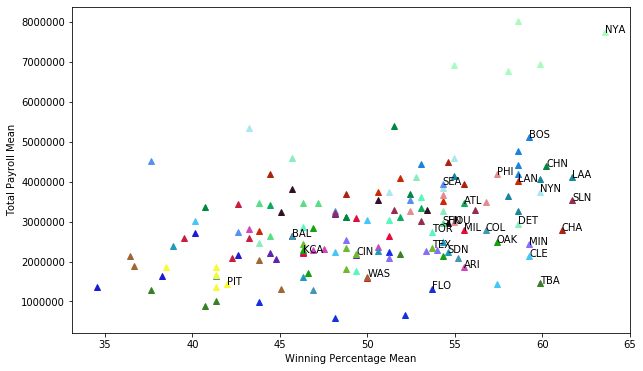

In [716]:
#2005-2009
fig, ax = plt.subplots(1,1, figsize=(10,6))
period4 = table[table.yearID >= 2005] 
period4 = period4[period4.yearID <= 2009]
new4= period4.set_index("teamID")
t = period4['teamID'].drop_duplicates()
period4.dropna(inplace = True) 
for i in t:
    g4 = period4.loc[lambda x: x['teamID'] == i]
    maxv4 = g4.loc[g4['Winning_Percentage_Mean'].idxmax()]
    plt.annotate(i, xy = (maxv4['Winning_Percentage_Mean'], maxv4['Total_Payroll_Mean']))
    x1 = new4.loc[i,'Winning_Percentage_Mean']
    y1 = new4.loc[i,'Total_Payroll_Mean']
    plt.plot(x1, y1, '^', color=np.random.rand(3,))    
ax.set_xlabel("Winning Percentage Mean")
ax.set_ylabel("Total Payroll Mean") 

Text(0, 0.5, 'Total Payroll Mean')

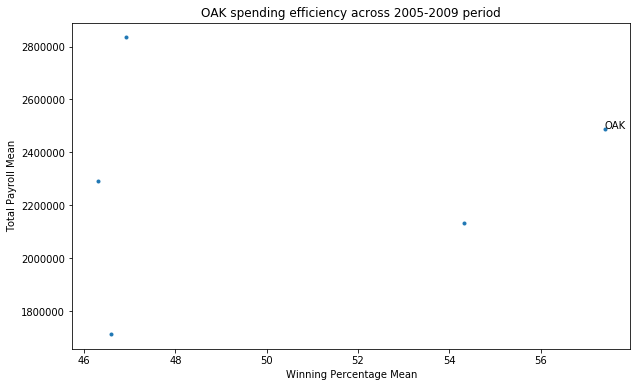

In [717]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
period1 = table[table.yearID >= 2005] 
period1 = period1[period1.yearID <= 2009]
period1 = period1[period1.teamID == 'OAK']
new= period1.set_index("teamID")
t1 = period1['teamID'].drop_duplicates()
for i in t1:
    g1 = period1.loc[lambda x: x['teamID'] == i]
    maxv1 = g1.loc[g1['Winning_Percentage_Mean'].idxmax()]
    plt.annotate(i, xy = (maxv1['Winning_Percentage_Mean'], maxv1['Total_Payroll_Mean']))
    x = new.loc[i,'Winning_Percentage_Mean']
    y = new.loc[i,'Total_Payroll_Mean']
    plt.plot(x, y, '.')
plt.title('OAK spending efficiency across 2005-2009 period')    
ax.set_xlabel("Winning Percentage Mean")
ax.set_ylabel("Total Payroll Mean")

Text(0, 0.5, 'Total Payroll Mean')

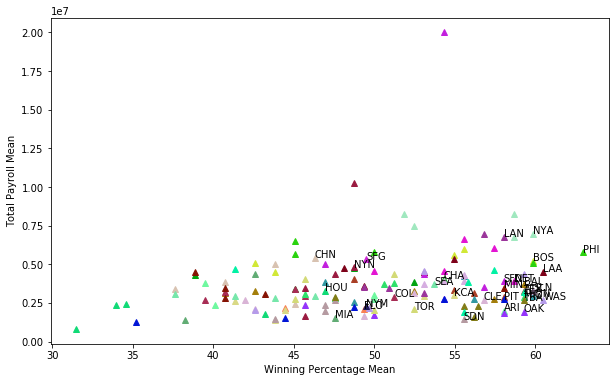

In [718]:
#2010-2014
fig, ax = plt.subplots(1,1, figsize=(10,6))
period5 = table[table.yearID >= 2010] 
period5 = period5[period5.yearID <= 2014]
new5= period5.set_index("teamID")
t = period5['teamID'].drop_duplicates()
for i in t:
    g5 = period5.loc[lambda x: x['teamID'] == i]
    maxv5 = g5.loc[g5['Winning_Percentage_Mean'].idxmax()]
    plt.annotate(i, xy = (maxv5['Winning_Percentage_Mean'], maxv5['Total_Payroll_Mean']))
    x1 = new5.loc[i,'Winning_Percentage_Mean']
    y1 = new5.loc[i,'Total_Payroll_Mean']
    plt.plot(x1, y1, '^', color=np.random.rand(3,))    
ax.set_xlabel("Winning Percentage Mean")
ax.set_ylabel("Total Payroll Mean")     

Text(0, 0.5, 'Total Payroll Mean')

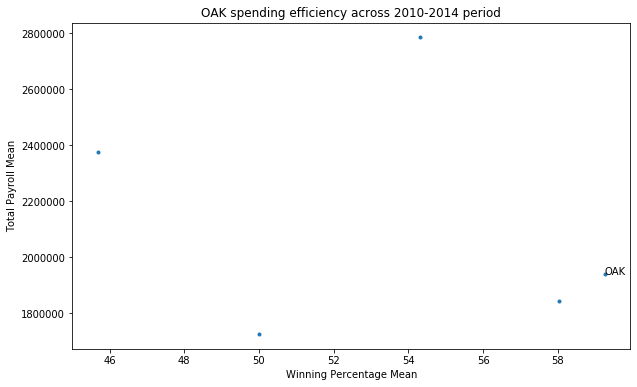

In [719]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
period1 = table[table.yearID >= 2010] 
period1 = period1[period1.yearID <= 2014]
period1 = period1[period1.teamID == 'OAK']
new= period1.set_index("teamID")
t1 = period1['teamID'].drop_duplicates()
for i in t1:
    g1 = period1.loc[lambda x: x['teamID'] == i]
    maxv1 = g1.loc[g1['Winning_Percentage_Mean'].idxmax()]
    plt.annotate(i, xy = (maxv1['Winning_Percentage_Mean'], maxv1['Total_Payroll_Mean']))
    x = new.loc[i,'Winning_Percentage_Mean']
    y = new.loc[i,'Total_Payroll_Mean']
    plt.plot(x, y, '.')
plt.title('OAK spending efficiency across 2010-2014 period')    
ax.set_xlabel("Winning Percentage Mean")
ax.set_ylabel("Total Payroll Mean") 

PART THREE: Data Transformations

Standardizing across years

Q1: The standardized payroll has clearer distribution of the payroll more than mean payroll

In [720]:
cc2 = payroll
l = []
l1 = []
standardized_payroll = {}
average_payroll = {}
y = 1985
for i, r in cc2.iterrows():
    if y == r['yearID']:
        l.append(r['Total_Payroll_Mean'])
    else:
        avg = statistics.mean(l)
        std = statistics.stdev(l)
        average_payroll[y] = avg
        standardized_payroll[y] = std
        y = r['yearID']
        l= [r['Total_Payroll_Mean']]
average_payroll[y] = statistics.mean(l)        
standardized_payroll[y] = statistics.stdev(l)

for i, r in cc2.iterrows():
    y = r['yearID']
    p = r['Total_Payroll_Mean']
    l1.append((p - average_payroll[y]) / standardized_payroll[y])
    
cc2['Standardized_Payroll'] = l1

cc2

,teamID,yearID,Total_Payroll,Total_Payroll_Mean,Standardized_Payroll
0,ATL,1985,14807.000,6.730455e+05,1.946823
1,BAL,1985,11560.712,5.254869e+05,0.500248
2,BOS,1985,10897.560,4.359024e+05,-0.377984
3,CAL,1985,14427.894,5.152819e+05,0.400205
4,CHA,1985,9846.178,4.688656e+05,-0.054832
5,CHN,1985,12702.917,5.774053e+05,1.009225
6,CIN,1985,8359.917,3.799962e+05,-0.926054
7,CLE,1985,6551.666,3.275833e+05,-1.439879
8,DET,1985,10348.143,5.174072e+05,0.421039
9,HOU,1985,9993.051,4.996525e+05,0.246984


Expected wins

Text(0, 0.5, 'Standardized Payroll')

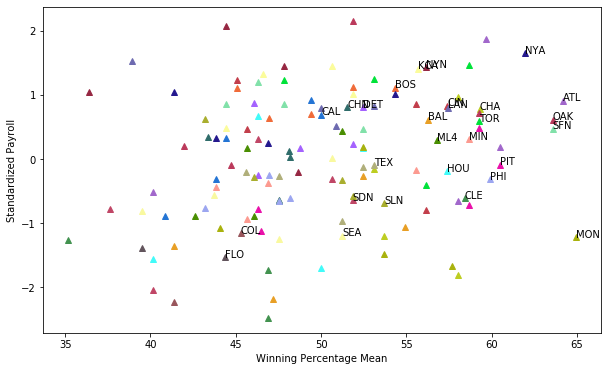

In [721]:
#1990-1994
fig, ax = plt.subplots(1,1, figsize=(10,6))
table11 = pd.merge(payroll, winperc, how='outer', on=['yearID','teamID'])
copy1 = table11[table11.yearID >= 1990] 
copy1 = copy1[copy1.yearID <= 1994]
t = copy1['teamID'].drop_duplicates()
table1 = copy1[['teamID', 'Winning_Percentage_Mean', 'Standardized_Payroll']]
index= copy1.set_index("teamID")
for i in t:
    z1 = table1.loc[lambda x: x['teamID'] == i]
    m1 = z1.loc[z1['Winning_Percentage_Mean'].idxmax()]
    plt.annotate(i, xy = (m1['Winning_Percentage_Mean'], m1['Standardized_Payroll']))
    x = index.loc[i,'Winning_Percentage_Mean']
    y = index.loc[i,'Standardized_Payroll']
    plt.plot(x, y, '^', color=np.random.rand(3,))
ax.set_xlabel("Winning Percentage Mean")
ax.set_ylabel("Standardized Payroll")  


Text(0, 0.5, 'Standardized Payroll')

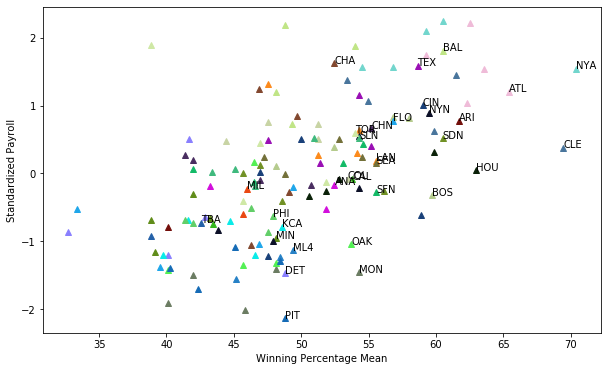

In [722]:
#1995-1999
fig, ax = plt.subplots(1,1, figsize=(10,6))
copy2 = table11[table11.yearID >= 1995] 
copy2 = copy2[copy2.yearID <= 1999]
t2 = copy2['teamID'].drop_duplicates()
table1 = copy2[['teamID', 'Winning_Percentage_Mean', 'Standardized_Payroll']]
index2= copy2.set_index("teamID")
for i in t2:
    z2 = table1.loc[lambda x: x['teamID'] == i]
    m2 = z2.loc[z2['Winning_Percentage_Mean'].idxmax()]
    plt.annotate(i, xy = (m2['Winning_Percentage_Mean'], m2['Standardized_Payroll']))
    x = index2.loc[i,'Winning_Percentage_Mean']
    y = index2.loc[i,'Standardized_Payroll']
    plt.plot(x, y, '^', color=np.random.rand(3,))
ax.set_xlabel("Winning Percentage Mean")
ax.set_ylabel("Standardized Payroll")      

Text(0, 0.5, 'Standardized Payroll')

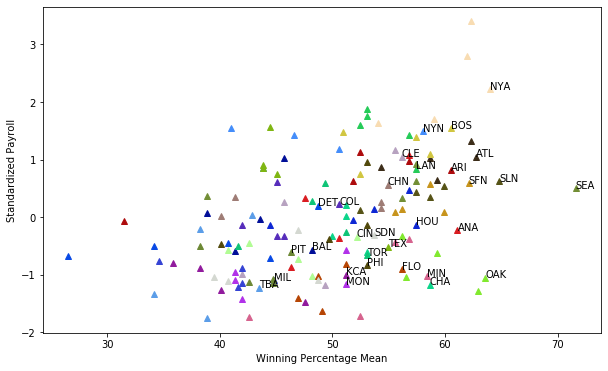

In [723]:
#2000-2004
fig, ax = plt.subplots(1,1, figsize=(10,6))
copy3 = table11[table11.yearID >= 2000] 
copy3 = copy3[copy3.yearID <= 2004]
t3 = copy3['teamID'].drop_duplicates()
table1 = copy3[['teamID', 'Winning_Percentage_Mean', 'Standardized_Payroll']]
index3= copy3.set_index("teamID")
for i in t3:
    z3 = table1.loc[lambda x: x['teamID'] == i]
    m3 = z3.loc[z3['Winning_Percentage_Mean'].idxmax()]
    plt.annotate(i, xy = (m3['Winning_Percentage_Mean'], m3['Standardized_Payroll']))
    x = index3.loc[i,'Winning_Percentage_Mean']
    y = index3.loc[i,'Standardized_Payroll']
    plt.plot(x, y, '^', color=np.random.rand(3,))
ax.set_xlabel("Winning Percentage Mean")
ax.set_ylabel("Standardized Payroll")  

Text(0, 0.5, 'Standardized Payroll')

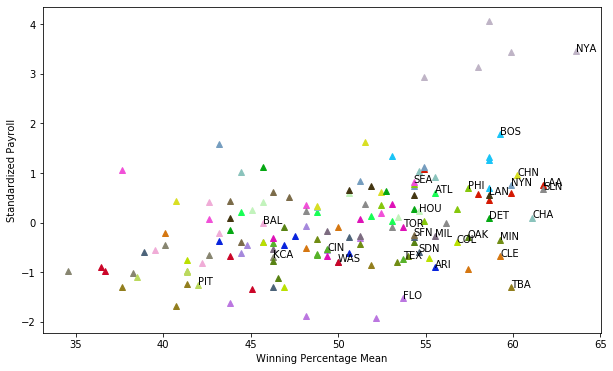

In [724]:
#2005-2009
fig, ax = plt.subplots(1,1, figsize=(10,6))
copy4 = table11[table11.yearID >= 2005] 
copy4 = copy4[copy4.yearID <= 2009]
t4 = copy4['teamID'].drop_duplicates()
table1 = copy4[['teamID', 'Winning_Percentage_Mean', 'Standardized_Payroll']]
index4= copy4.set_index("teamID")
for i in t4:
    z4 = table1.loc[lambda x: x['teamID'] == i]
    m4 = z4.loc[z4['Winning_Percentage_Mean'].idxmax()]
    plt.annotate(i, xy = (m4['Winning_Percentage_Mean'], m4['Standardized_Payroll']))
    x = index4.loc[i,'Winning_Percentage_Mean']
    y = index4.loc[i,'Standardized_Payroll']
    plt.plot(x, y, '^', color=np.random.rand(3,))
ax.set_xlabel("Winning Percentage Mean")
ax.set_ylabel("Standardized Payroll")  

Text(0, 0.5, 'Standardized Payroll')

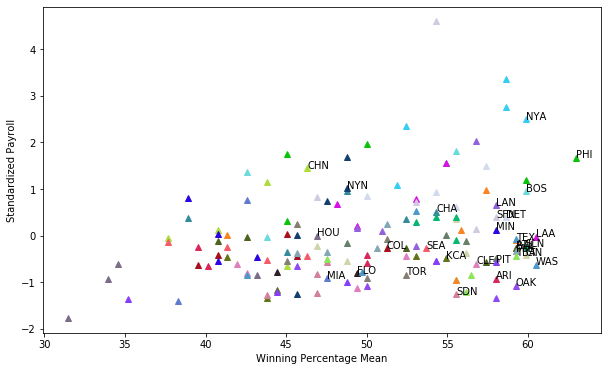

In [725]:
#2010-2014
fig, ax = plt.subplots(1,1, figsize=(10,6))
copy5 = table11[table11.yearID >= 2010] 
copy5 = copy5[copy5.yearID <= 2014]
t5 = copy5['teamID'].drop_duplicates()
table1 = copy5[['teamID', 'Winning_Percentage_Mean', 'Standardized_Payroll']]
index5= copy5.set_index("teamID")
table1 = table1.dropna();
for i in t5:
    z5 = table1.loc[lambda x: x['teamID'] == i]
    if z5['Winning_Percentage_Mean'].empty:
        print()
    else:  
        m5 = z5.loc[z5['Winning_Percentage_Mean'].idxmax()]
        plt.annotate(i, xy = (m5['Winning_Percentage_Mean'], m5['Standardized_Payroll']))
        x = index5.loc[i,'Winning_Percentage_Mean']
        y = index5.loc[i,'Standardized_Payroll']
        plt.plot(x, y, '^', color=np.random.rand(3,))
ax.set_xlabel("Winning Percentage Mean")
ax.set_ylabel("Standardized Payroll")         

Text(0, 0.5, 'Winning_Percentage_Mean')

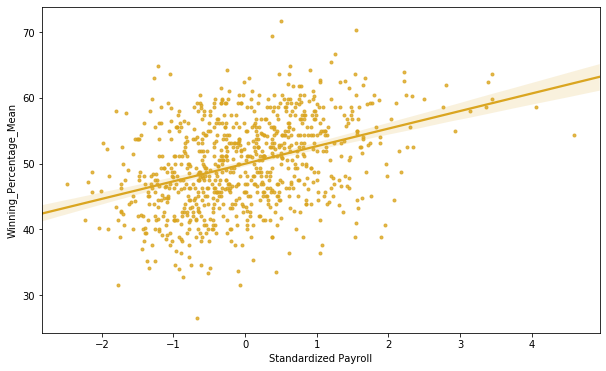

In [726]:
# table11["Standardized_Payroll"] = table11["Standardized_Payroll"]*2.5
# table11["Standardized_Payroll"] = table11["Standardized_Payroll"]+50
# d = table11
# plt.scatter(x=d["Standardized_Payroll"], y=d["Winning_Percentage_Mean"])
# plt.show()
d = table11
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax = sns.regplot(x="Standardized_Payroll", y="Winning_Percentage_Mean", data=d, marker=".", color='goldenrod')
ax.set_xlabel("Standardized Payroll")
ax.set_ylabel("Winning_Percentage_Mean")  

Spending efficiency

Q1: knowing that Moneyball period from 2002-2003 so we plot period from 200-2004 and 
showes that Oakland's efficiency during this period is so high especially at 2002 even when they pay a little, they get a high win
see that efficiency is so good

Text(0, 0.5, 'efficiency')

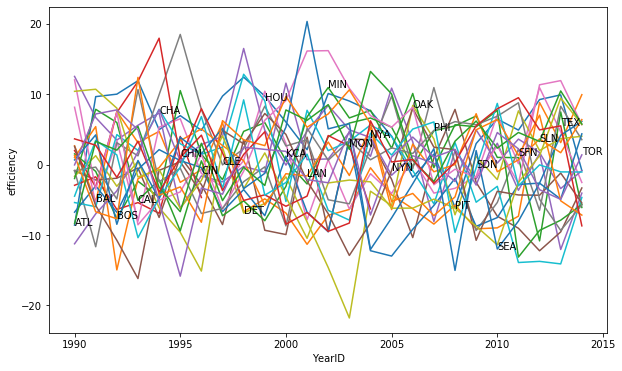

In [727]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
eff = []
for i, r in table11.iterrows():
    res = 50 + 2.5 * r['Standardized_Payroll']
    eff.append(r['Winning_Percentage_Mean'] - res)
table11['efficiency'] = eff
table11.sort_values("yearID", ascending=True)
table1 = table11[table11.yearID >= 1990] 
table1 = table1[table1.yearID <= 2014]
tmp = table1['teamID'].drop_duplicates()
table1 = table1.set_index(keys='teamID')
table1 = table1.dropna()
y = 1990
for i in tmp:
    r1 = table1.loc[lambda x: x['yearID'] == y]
    if i in r1.index:
        if (y <= 2014):
            n = r1.loc[i,'efficiency']
            plt.annotate(i, xy = (y, n))
            w = table1.loc[i,'yearID']
            z = table1.loc[i,'efficiency']
            plt.plot(w, z)
            y+=1 
            
ax.set_xlabel("YearID")
ax.set_ylabel("efficiency")            

Text(0, 0.5, 'OAK efficiency')

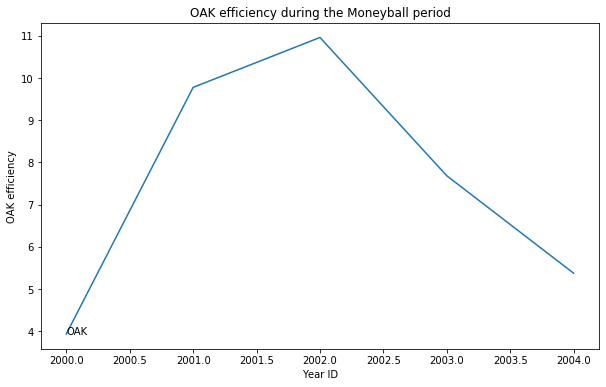

In [728]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
eff = []
for i, r in table11.iterrows():
    eff.append(r['Winning_Percentage_Mean'] - 50 + 2.5 * r['Standardized_Payroll'])
table11['efficiency'] = eff
table11.sort_values("yearID", ascending=True)
table1 = table11[table11.yearID >= 2000] 
table1 = table1[table1.yearID <= 2004]
table1 = table1[table1.teamID =='OAK']
tmp = table1['teamID'].drop_duplicates()
table1 = table1.set_index(keys='teamID')
table1 = table1.dropna()
y = 2000
for i in tmp:
    r1 = table1.loc[lambda x: x['yearID'] == y]
    if i in r1.index:
        if (y <= 2004):
            n = r1.loc[i,'efficiency']
            plt.annotate(i, xy = (y, n))
            w = table1.loc[i,'yearID']
            z = table1.loc[i,'efficiency']
            plt.plot(w, z)
            y+=1 
plt.title('OAK efficiency during the Moneyball period')                       
ax.set_xlabel("Year ID")
ax.set_ylabel("OAK efficiency")            